<a href="https://colab.research.google.com/github/FabioCannavaro/SmartPolicing_Bigdata_Analyze/blob/main/traffic_acident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
ls

'13. FasterRCNN.gdoc'
'Candito 6 Week Program | LiftVault.com의 사본.gsheet'
'Colab Notebooks'/
 Data_Science/
 dataset/
 fah_converter.ipynb
'faster rcnn'/
 GVT10x10.gsheet
 mnist-original.mat
 traffic/
 yolov5.ipynb
 김대한_컴퓨터공학과_2020113384.zip
'사본: Juggernaut Method Base Template Spreadsheet.gsheet'
'사본: 거인의비밀 ver.3.3.xlsx'
'최종 게임'/
'캔디토 리니어.xlsx 사본'


In [ ]:
%cd /content/drive/My Drive/traffic/

/content/drive/My Drive/traffic


In [ ]:
ls

codeBook_v3.xlsx  KP2020.csv  KP2021.csv  NPA2020.csv


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import glob
import seaborn as sns
import statsmodels.api as sm
import array
import re 
import datetime as dt

file_path='/content/drive/MyDrive/traffic/KP2020.csv'

df=pd.read_csv(file_path, encoding='cp949')
df

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,13,10,601,1.0,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,19,10,606,3.0,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
...,...,...,...,...,...,...,...,...,...,...
77072,충남청,20/12/31 01:18:16.000000000,19,10,302,2.0,충청남도 보령시 주교면 주교리(행정:주교면) 191-6,126.571002,36.387791,NaN
77073,충남청,20/12/31 01:17:45.000000000,19,10,501,3.0,NaN,NaN,NaN,NaN
77074,충남청,20/12/31 00:13:50.000000000,19,10,604,3.0,충청남도 아산시 온천동(행정:온양1동) 1498,127.000391,36.788411,NaN
77075,대전청,20/12/31 00:49:29.000000000,13,10,302,2.0,대전광역시 서구 갈마동(행정:갈마2동) 975,127.373351,36.348051,Y


In [ ]:
df.columns

Index(['RECV_DEPT_NM', 'RECV_CPLT_DM', 'NPA_CL', 'EVT_STAT_CD', 'EVT_CL_CD',
       'RPTER_SEX', 'HPPN_PNU_ADDR', 'HPPN_X', 'HPPN_Y', 'SME_EVT_YN'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77077 entries, 0 to 77076
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECV_DEPT_NM   77077 non-null  object 
 1   RECV_CPLT_DM   77077 non-null  object 
 2   NPA_CL         77077 non-null  int64  
 3   EVT_STAT_CD    77077 non-null  int64  
 4   EVT_CL_CD      77077 non-null  int64  
 5   RPTER_SEX      74658 non-null  float64
 6   HPPN_PNU_ADDR  47805 non-null  object 
 7   HPPN_X         60313 non-null  float64
 8   HPPN_Y         60313 non-null  float64
 9   SME_EVT_YN     13442 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.9+ MB


In [ ]:
df.RPTER_SEX

0        1.0
1        3.0
2        1.0
3        3.0
4        2.0
        ... 
77072    2.0
77073    3.0
77074    3.0
77075    2.0
77076    3.0
Name: RPTER_SEX, Length: 77077, dtype: float64

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49707 missing from current font.
  font.set_

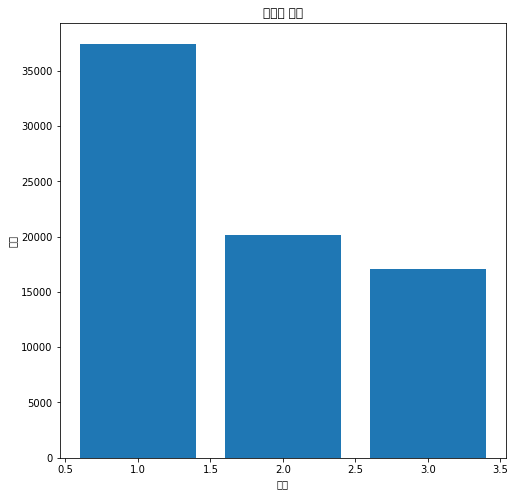

In [ ]:
sexdata=df.RPTER_SEX.value_counts().sort_index(ascending=True)
#SEX_COUNT[:3].plot(kind='barh')

plt.figure(figsize=(8,8))
plt.bar(sexdata.index,sexdata)
plt.title('신고자 성별')
plt.xlabel('성별')
plt.ylabel('숫자')
plt.show()

In [ ]:
df.RECV_DEPT_NM

0        충남청
1        대전청
2        대전청
3        충남청
4        충남청
        ... 
77072    충남청
77073    충남청
77074    충남청
77075    대전청
77076    대전청
Name: RECV_DEPT_NM, Length: 77077, dtype: object

In [ ]:
df.RECV_DEPT_NM.unique()

array(['충남청', '대전청', '2지구대(충남)', '남대전지구대', '대전대덕', '대전동부', '대전파출소',
       '대전역지구대', '대전중부', '대전둔산', '대전서부', '서대전지구대', '대전유성', '세종로파출소', '세종',
       '세종청'], dtype=object)

In [ ]:
partdata=dept_by_accident=df.RECV_DEPT_NM.value_counts()
partdata

충남청         41814
대전청         34600
2지구대(충남)       95
대전역지구대         89
남대전지구대         70
대전동부           64
서대전지구대         60
대전둔산           55
대전유성           48
대전중부           47
대전서부           47
대전대덕           34
대전파출소          15
세종로파출소         14
세종             14
세종청            11
Name: RECV_DEPT_NM, dtype: int64

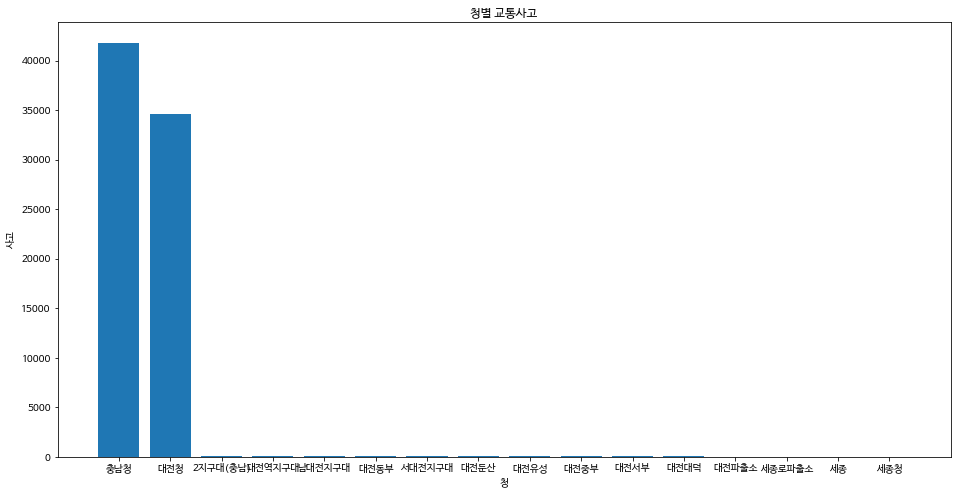

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
#dept_by_accident[:16].plot(kind='barh')
plt.figure(figsize=(16,8))
plt.bar(partdata.index,partdata)
plt.title('청별 교통사고')
plt.xlabel('청')
plt.ylabel('사고')
plt.show()

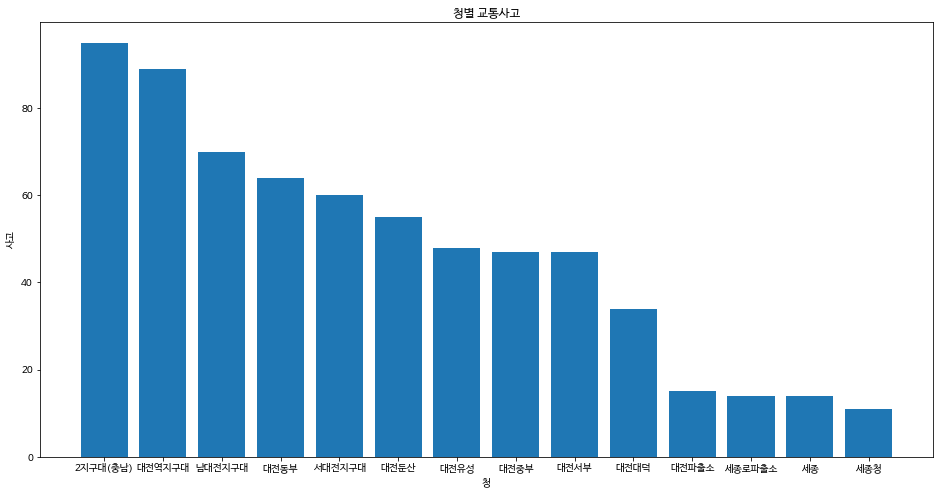

In [ ]:
#dept_by_accident[2:16].plot(kind='barh')
plt.figure(figsize=(16,8))
plt.bar(partdata[2:16].index,partdata[2:16])
plt.title('청별 교통사고')
plt.xlabel('청')
plt.ylabel('사고')
plt.show()

In [ ]:
df['Date']=pd.to_datetime(df['RECV_CPLT_DM'], format='%y/%m/%d %H:%M:%S.%f')
cnt_time=df['Date']
cnt_time


0       2020-12-01 01:43:07
1       2020-12-01 02:05:04
2       2020-12-01 02:06:52
3       2020-12-01 02:37:25
4       2020-12-01 08:17:50
                ...        
77072   2020-12-31 01:18:16
77073   2020-12-31 01:17:45
77074   2020-12-31 00:13:50
77075   2020-12-31 00:49:29
77076   2020-12-31 00:49:06
Name: Date, Length: 77077, dtype: datetime64[ns]

In [ ]:
df['Date_date']=df['Date'].dt.date #날짜별로 데이터처리
df['Date_day']=df['Date'].dt.day #일별로 데이터 처리
df['Date_time']=df['Date'].dt.time #전체 시간별로 데이터 처리
df['Date_hour']=df['Date'].dt.hour #시간별로 데이터 처리(0~23시)
df['Date_weekname']=df['Date'].dt.day_name() #요일별 데이터 처리

In [ ]:
datedata=df['Date_date'].value_counts().sort_index(ascending=True) #날짜별
datedata

2020-12-01    1947
2020-12-02    1777
2020-12-03    1917
2020-12-04    2074
2020-12-05    2123
2020-12-06    1776
2020-12-07    2076
2020-12-08    2043
2020-12-09    2255
2020-12-10    2844
2020-12-11    3526
2020-12-12    2862
2020-12-13    2173
2020-12-14    2466
2020-12-15    2384
2020-12-16    2514
2020-12-17    2804
2020-12-18    3042
2020-12-19    2513
2020-12-20    2267
2020-12-21    2609
2020-12-22    2549
2020-12-23    2665
2020-12-24    3005
2020-12-25    2890
2020-12-26    2527
2020-12-27    2560
2020-12-28    2716
2020-12-29    2605
2020-12-30    2640
2020-12-31    2928
Name: Date_date, dtype: int64

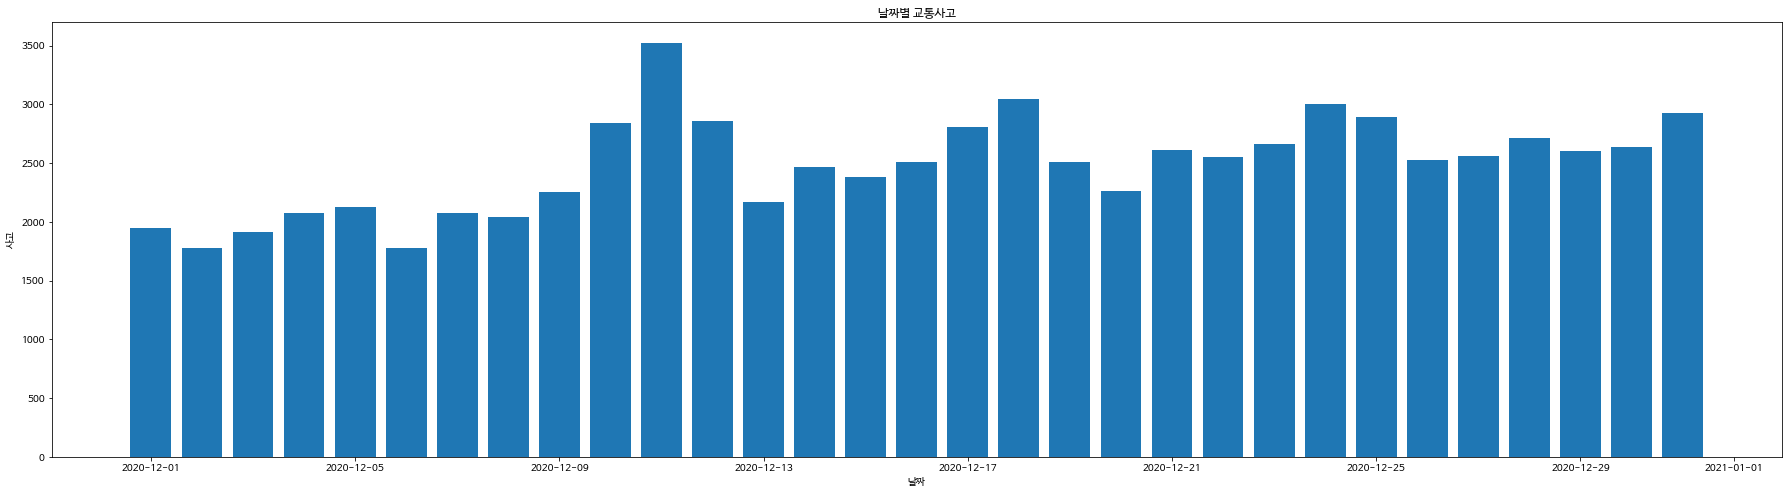

In [ ]:
plt.figure(figsize=(31,8))
plt.bar(datedata.index,datedata)
plt.title('날짜별 교통사고')
plt.xlabel('날짜')
plt.ylabel('사고')
plt.show()

In [ ]:
hourdata=df['Date_hour'].value_counts().sort_index(ascending=True) #시간별
hourdata

0     3377
1     2670
2     2088
3     1728
4     1252
5     1161
6     1269
7     1481
8     2125
9     2802
10    3441
11    3429
12    3530
13    3685
14    4111
15    4197
16    4182
17    4313
18    4482
19    4005
20    4033
21    4806
22    4955
23    3955
Name: Date_hour, dtype: int64

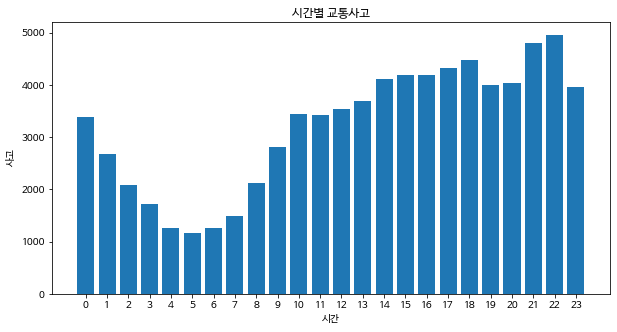

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(hourdata.index,hourdata)
plt.title('시간별 교통사고')
plt.xlabel('시간')
plt.ylabel('사고')
plt.xticks(np.arange(24))
plt.show()

In [ ]:
weekdata=df['Date_weekname'].value_counts().sort_index(ascending=True)
weekdata

Friday       11532
Monday        9867
Saturday     10025
Sunday        8776
Thursday     13498
Tuesday      11528
Wednesday    11851
Name: Date_weekname, dtype: int64

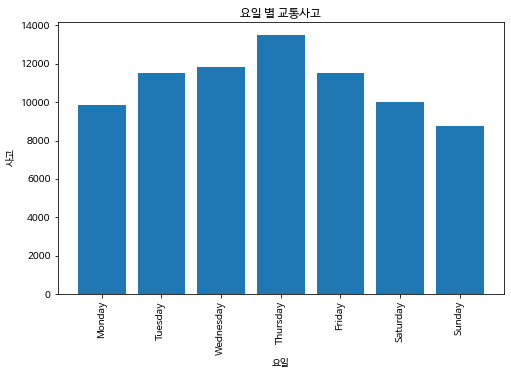

In [ ]:
weeks=['Monday','Tuesday','Wednesday','Thursday',"Friday","Saturday","Sunday"]
weekdata=weekdata.agg(weeks)
plt.figure(figsize=(8,5))
plt.bar(weekdata.index,weekdata)
plt.title('요일 별 교통사고')
plt.xlabel('요일')
plt.ylabel('사고')
plt.xticks(rotation=90)
plt.show()

===========================================================================
**401, 402, 403, 404 따로 분류**
======================================

In [ ]:
#EVT_CL_CD(사건종별코드) == 401, 402, 403, 404인 행 
is_accident = (df['EVT_CL_CD'] == 401) | (df['EVT_CL_CD']==402) | (df['EVT_CL_CD']==403) | (df['EVT_CL_CD']==404)
accident = df[is_accident]
accident

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,Date,Date_date,Date_day,Date_time,Date_hour,Date_weekname
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN,2020-12-01 08:17:50,2020-12-01,1,08:17:50,8,Tuesday
8,충남청,20/12/01 07:37:18.000000000,19,10,402,1.0,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,NaN,2020-12-01 07:37:18,2020-12-01,1,07:37:18,7,Tuesday
9,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN,2020-12-01 07:08:44,2020-12-01,1,07:08:44,7,Tuesday
10,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN,2020-12-01 07:09:20,2020-12-01,1,07:09:20,7,Tuesday
11,충남청,20/12/01 08:21:08.000000000,19,10,402,1.0,충청남도 청양군 남양면 온직리(남양면) 산31,126.807222,36.395000,NaN,2020-12-01 08:21:08,2020-12-01,1,08:21:08,8,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76998,충남청,20/12/31 00:34:45.000000000,19,10,401,1.0,충청남도 서산시 온석동(동문1동) 393-3,126.471756,36.801603,Y,2020-12-31 00:34:45,2020-12-31,31,00:34:45,0,Thursday
77023,충남청,20/12/31 00:12:19.000000000,31,10,402,1.0,세종특별자치시 세종시 아름동(행정:아름동),127.249663,36.511364,NaN,2020-12-31 00:12:19,2020-12-31,31,00:12:19,0,Thursday
77036,대전청,20/12/31 01:08:43.000000000,13,10,401,1.0,대전광역시 중구 대흥동(행정:대흥동),127.428343,36.324386,NaN,2020-12-31 01:08:43,2020-12-31,31,01:08:43,1,Thursday
77068,대전청,20/12/31 01:17:01.000000000,13,10,401,1.0,대전광역시 서구 도마동(행정:도마2동) 549-1,127.369099,36.312971,NaN,2020-12-31 01:17:01,2020-12-31,31,01:17:01,1,Thursday


In [ ]:
accident[['HPPN_X', 'HPPN_Y']].value_counts().loc[lambda x:x>1]

HPPN_X      HPPN_Y   
127.404663  36.341685    236
127.415465  36.358555     17
127.432362  36.358932     15
127.403651  36.357021     12
127.432176  36.359160      9
                        ... 
127.380750  36.327233      2
127.301330  36.486318      2
127.165278  36.812222      2
127.099780  36.827350      2
126.557850  37.026267      2
Length: 668, dtype: int64

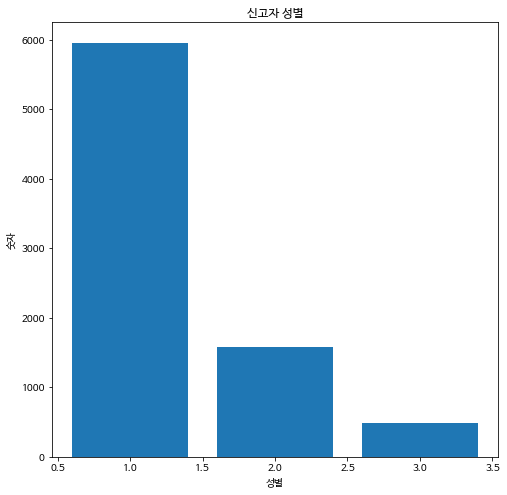

In [ ]:
sexdata_20=accident.RPTER_SEX.value_counts().sort_index(ascending=True)

plt.figure(figsize=(8,8))
plt.bar(sexdata_20.index,sexdata_20)
plt.title('신고자 성별')
plt.xlabel('성별')
plt.ylabel('숫자')
plt.show()

In [ ]:
accident_dept_20=accident.RECV_DEPT_NM
accident_dept_20

4        충남청
8        충남청
9        대전청
10       대전청
11       충남청
        ... 
76998    충남청
77023    충남청
77036    대전청
77068    대전청
77069    대전청
Name: RECV_DEPT_NM, Length: 8017, dtype: object

In [ ]:
partdata_20=dept_by_accident=accident_dept_20.value_counts()
partdata_20

충남청         4381
대전청         3488
2지구대(충남)      85
남대전지구대        11
대전파출소         10
대전역지구대        10
대전유성           8
서대전지구대         7
세종청            4
대전대덕           4
대전중부           3
세종             3
대전둔산           2
대전동부           1
Name: RECV_DEPT_NM, dtype: int64

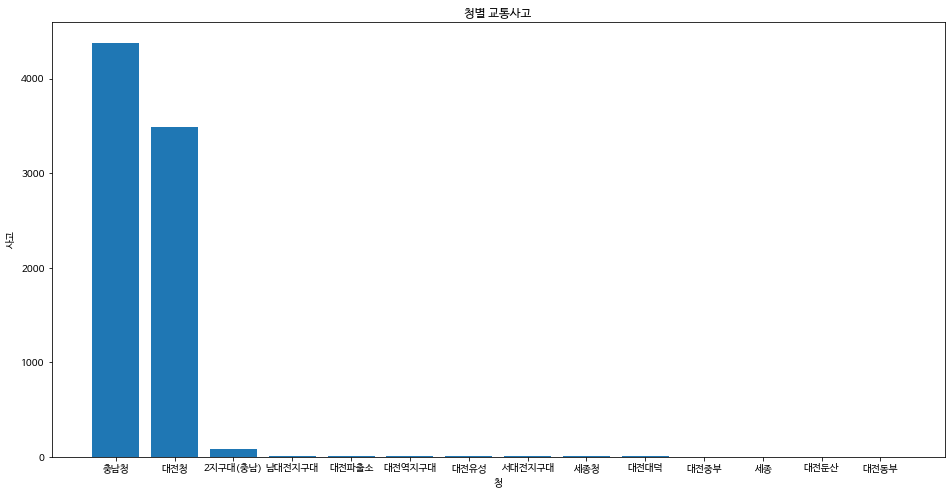

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(partdata_20.index,partdata_20)
plt.title('청별 교통사고')
plt.xlabel('청')
plt.ylabel('사고')
plt.show()

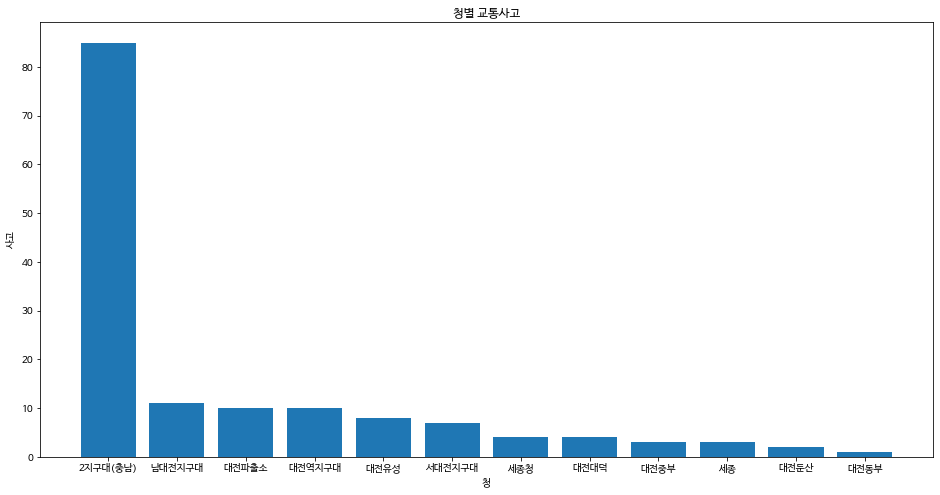

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(partdata_20[2:16].index,partdata_20[2:16])
plt.title('청별 교통사고')
plt.xlabel('청')
plt.ylabel('사고')
plt.show()

In [ ]:
#df['Date']=pd.to_datetime(df['RECV_CPLT_DM'], format='%y/%m/%d %H:%M:%S.%f')
accident.Date

4       2020-12-01 08:17:50
8       2020-12-01 07:37:18
9       2020-12-01 07:08:44
10      2020-12-01 07:09:20
11      2020-12-01 08:21:08
                ...        
76998   2020-12-31 00:34:45
77023   2020-12-31 00:12:19
77036   2020-12-31 01:08:43
77068   2020-12-31 01:17:01
77069   2020-12-31 01:18:53
Name: Date, Length: 8017, dtype: datetime64[ns]

In [ ]:
datedata_20=accident.Date_date.value_counts().sort_index(ascending=True) #날짜별
datedata_20

2020-12-01    285
2020-12-02    309
2020-12-03    302
2020-12-04    332
2020-12-05    286
2020-12-06    215
2020-12-07    318
2020-12-08    274
2020-12-09    259
2020-12-10    267
2020-12-11    271
2020-12-12    261
2020-12-13    167
2020-12-14    233
2020-12-15    282
2020-12-16    233
2020-12-17    251
2020-12-18    335
2020-12-19    228
2020-12-20    164
2020-12-21    290
2020-12-22    213
2020-12-23    276
2020-12-24    315
2020-12-25    193
2020-12-26    204
2020-12-27    150
2020-12-28    233
2020-12-29    220
2020-12-30    225
2020-12-31    426
Name: Date_date, dtype: int64

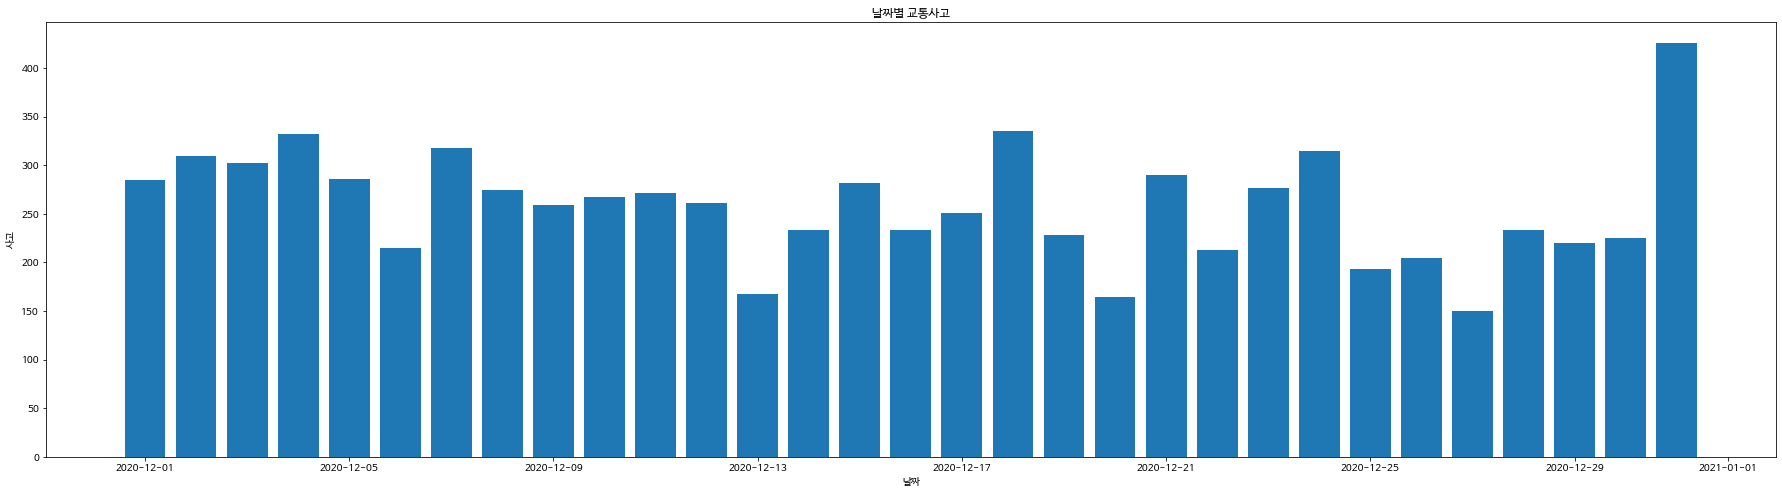

In [ ]:
plt.figure(figsize=(31,8))
plt.bar(datedata_20.index,datedata_20)
plt.title('날짜별 교통사고')
plt.xlabel('날짜')
plt.ylabel('사고')
plt.show()

In [ ]:
hourdata_20=accident.Date_hour.value_counts().sort_index(ascending=True) #시간별
hourdata_20

0     163
1     115
2      67
3      54
4      38
5      71
6     132
7     275
8     419
9     396
10    424
11    417
12    427
13    465
14    472
15    523
16    483
17    598
18    744
19    431
20    372
21    410
22    331
23    190
Name: Date_hour, dtype: int64

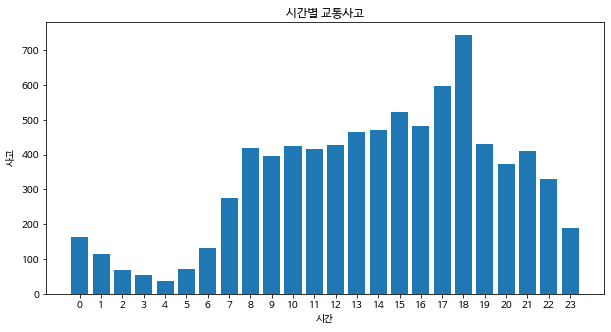

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(hourdata_20.index,hourdata_20)
plt.title('시간별 교통사고')
plt.xlabel('시간')
plt.ylabel('사고')
plt.xticks(np.arange(24))
plt.show()

In [ ]:
weekdata_20=accident.Date_weekname.value_counts().sort_index(ascending=True)
weekdata_20

Friday       1131
Monday       1074
Saturday      979
Sunday        696
Thursday     1561
Tuesday      1274
Wednesday    1302
Name: Date_weekname, dtype: int64

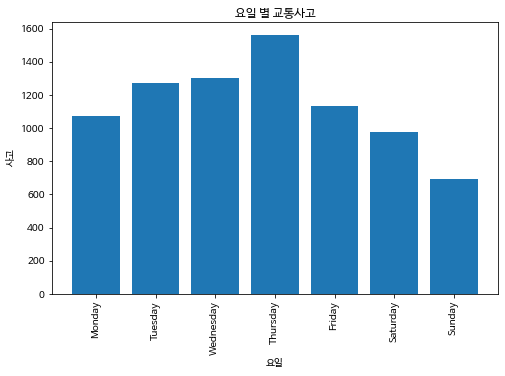

In [ ]:
weeks=['Monday','Tuesday','Wednesday','Thursday',"Friday","Saturday","Sunday"]
weekdata_20=weekdata_20.agg(weeks)
plt.figure(figsize=(8,5))
plt.bar(weekdata_20.index,weekdata_20)
plt.title('요일 별 교통사고')
plt.xlabel('요일')
plt.ylabel('사고')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#충청남도에서 발생한 교통사고
is_chungnam_acc_KP2020 = accident['HPPN_PNU_ADDR'].str.contains("충청남도", na = False)
chungnam_accident_KP2020 = accident[is_chungnam_acc_KP2020]
chungnam_accident_KP2020

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,Date,Date_date,Date_day,Date_time,Date_hour,Date_weekname
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN,2020-12-01 08:17:50,2020-12-01,1,08:17:50,8,Tuesday
8,충남청,20/12/01 07:37:18.000000000,19,10,402,1.0,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,NaN,2020-12-01 07:37:18,2020-12-01,1,07:37:18,7,Tuesday
11,충남청,20/12/01 08:21:08.000000000,19,10,402,1.0,충청남도 청양군 남양면 온직리(남양면) 산31,126.807222,36.395000,NaN,2020-12-01 08:21:08,2020-12-01,1,08:21:08,8,Tuesday
31,충남청,20/12/01 01:36:38.000000000,19,10,401,1.0,충청남도 서산시 대산읍 대로리(행정:대산읍) 216-3,126.412290,36.967612,NaN,2020-12-01 01:36:38,2020-12-01,1,01:36:38,1,Tuesday
57,충남청,20/12/01 02:23:03.000000000,19,10,401,1.0,충청남도 아산시 둔포면 송용리(행정:둔포면) 71-68,127.032318,36.921510,NaN,2020-12-01 02:23:03,2020-12-01,1,02:23:03,2,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76855,충남청,20/12/30 17:48:50.000000000,19,10,401,3.0,충청남도 서산시 석남동(행정:석남동) 16-28,126.453121,36.771080,NaN,2020-12-30 17:48:50,2020-12-30,30,17:48:50,17,Wednesday
76957,충남청,20/12/30 16:41:25.000000000,19,10,401,1.0,충청남도 예산군 덕산면 신평리(덕산면) 171-5,126.661613,36.694186,NaN,2020-12-30 16:41:25,2020-12-30,30,16:41:25,16,Wednesday
76971,충남청,20/12/31 00:15:47.000000000,19,10,401,1.0,충청남도 아산시 둔포면 둔포리(행정:둔포면) 415-3,127.037671,36.927216,Y,2020-12-31 00:15:47,2020-12-31,31,00:15:47,0,Thursday
76995,충남청,20/12/31 00:33:54.000000000,19,10,401,1.0,충청남도 서산시 온석동(동문1동) 354-2,126.471991,36.801294,Y,2020-12-31 00:33:54,2020-12-31,31,00:33:54,0,Thursday


In [ ]:
chungnam_accident_KP2020['City']=chungnam_accident_KP2020['HPPN_PNU_ADDR'].str.split(" ").str[1]
chungnam_accident_KP2020.City.unique()

<ipython-input-40-bb037c3fb608>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chungnam_accident_KP2020['City']=chungnam_accident_KP2020['HPPN_PNU_ADDR'].str.split(" ").str[1]


array(['천안시', '청양군', '서산시', '아산시', '논산시', '보령시', '금산군', '공주시', '당진시',
       '태안군', '예산군', '서천군', '홍성군', '계룡시', '부여군', '충청남도'], dtype=object)

In [ ]:
chungnam_accident_KP2020['Dong']=chungnam_accident_KP2020['HPPN_PNU_ADDR'].str.split(" ").str[1]

<ipython-input-41-45e4cb0163e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chungnam_accident_KP2020['Dong']=chungnam_accident_KP2020['HPPN_PNU_ADDR'].str.split(" ").str[1]


# **2021**

In [ ]:
file_path2='/content/drive/MyDrive/traffic/KP2021.csv'

df_2021 = pd.read_csv(file_path2, encoding='cp949')
df_2021

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,대전청,21/03/07 00:00:01.000000000,13,10,604,3.0,대전광역시 서구 둔산동 1122,127.373676,36.350975,Y
1,대전청,21/03/07 00:02:13.000000000,13,10,201,1.0,대전광역시 유성구 상대동(원신흥동) 469-9,127.339018,36.347420,NaN
2,대전청,21/03/07 00:00:33.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
3,대전청,21/03/07 00:01:18.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
4,대전청,21/03/07 00:01:43.000000000,13,10,308,1.0,대전광역시 중구 선화동 141-16,127.420455,36.330413,NaN
...,...,...,...,...,...,...,...,...,...,...
2594055,대전청,23/01/12 11:23:09.000000000,13,10,104,1.0,대전광역시 유성구 봉명동 (행정:원신흥동 ) 1016-7,127.344600,36.352272,NaN
2594056,충남청,23/01/16 11:59:47.000000000,19,10,307,2.0,충청남도 서산시 음암면 부장리(음암면 ) 560-4,126.514047,36.785626,NaN
2594057,충남청,23/01/16 11:58:54.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN
2594058,충남청,23/01/14 01:00:47.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN


In [ ]:
df_2021['Date']=pd.to_datetime(df_2021['RECV_CPLT_DM'], format='%y/%m/%d %H:%M:%S.%f')
cnt_time_21=df_2021['Date']
cnt_time_21

0         2021-03-07 00:00:01
1         2021-03-07 00:02:13
2         2021-03-07 00:00:33
3         2021-03-07 00:01:18
4         2021-03-07 00:01:43
                  ...        
2594055   2023-01-12 11:23:09
2594056   2023-01-16 11:59:47
2594057   2023-01-16 11:58:54
2594058   2023-01-14 01:00:47
2594059   2023-01-14 01:22:31
Name: Date, Length: 2594060, dtype: datetime64[ns]

In [ ]:
df_2021['Date_month']=df_2021['Date'].dt.month #월별로 데이터처리
df_2021['Date_month_name']=df_2021['Date'].dt.month_name() #월별로 데이터처리
df_2021['Date_date']=df_2021['Date'].dt.date #날짜별로 데이터처리
df_2021['Date_day']=df_2021['Date'].dt.day #일별로 데이터 처리
df_2021['Date_time']=df_2021['Date'].dt.time #전체 시간별로 데이터 처리
df_2021['Date_hour']=df_2021['Date'].dt.hour #시간별로 데이터 처리(0~23시)
df_2021['Date_weekname']=df_2021['Date'].dt.day_name() #요일별 데이터 처리

In [ ]:
#2021.csv에서 EVT_CL_CD(사건종별코드) == 401, 402, 403, 404인 행 
is_accident_2021 = (df_2021['EVT_CL_CD'] == 401) | (df_2021['EVT_CL_CD']==402) | (df_2021['EVT_CL_CD']==403) | (df_2021['EVT_CL_CD']==404)
accident_2021 = df_2021[is_accident_2021]
accident_2021

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,Date,Date_month,Date_month_name,Date_date,Date_day,Date_time,Date_hour,Date_weekname
20,충남청,21/03/07 00:09:04.000000000,19,10,402,1.0,충청남도 천안시 동남구 문화동(문성동) 41-5,127.150988,36.811792,Y,2021-03-07 00:09:04,3,March,2021-03-07,7,00:09:04,0,Sunday
23,대전청,21/03/07 00:07:54.000000000,13,10,401,2.0,대전광역시 서구 괴정동(괴정동) 367-40,127.371854,36.341961,NaN,2021-03-07 00:07:54,3,March,2021-03-07,7,00:07:54,0,Sunday
26,대전청,21/03/07 00:15:27.000000000,13,10,401,1.0,대전광역시 유성구 상대동 471-2,127.339334,36.346899,NaN,2021-03-07 00:15:27,3,March,2021-03-07,7,00:15:27,0,Sunday
44,충남청,21/03/07 00:12:08.000000000,19,10,403,2.0,충청남도 공주시 우성면 평목리,127.090733,36.453397,NaN,2021-03-07 00:12:08,3,March,2021-03-07,7,00:12:08,0,Sunday
49,충남청,21/03/07 00:13:58.000000000,19,10,401,1.0,충청남도 천안시 동남구 목천읍 운전리(목천읍) 333-1,127.230796,36.767596,NaN,2021-03-07 00:13:58,3,March,2021-03-07,7,00:13:58,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593994,대전청,23/01/15 20:01:39.000000000,13,10,401,1.0,대전 서구 괴정동 88-6,127.384284,36.334507,NaN,2023-01-15 20:01:39,1,January,2023-01-15,15,20:01:39,20,Sunday
2594002,충남청,23/01/16 21:26:56.000000000,19,10,401,1.0,충청남도 태안군 근흥면 두야리(근흥면 ) 246-2,126.262393,36.751467,NaN,2023-01-16 21:26:56,1,January,2023-01-16,16,21:26:56,21,Monday
2594006,충남청,23/01/14 01:02:48.000000000,19,10,403,2.0,충청남도 천안시 동남구 다가동 (일봉동 ) 61-35,127.147678,36.789125,NaN,2023-01-14 01:02:48,1,January,2023-01-14,14,01:02:48,1,Saturday
2594019,대전청,23/01/14 17:35:38.000000000,13,10,401,1.0,대전광역시 대덕구 신탄진동 (행정:신탄진동 ) 129-7,127.433785,36.450725,NaN,2023-01-14 17:35:38,1,January,2023-01-14,14,17:35:38,17,Saturday


In [ ]:
accident_2021[['HPPN_Y', 'HPPN_X']].value_counts().loc[lambda x:x>1]

HPPN_X      HPPN_Y   
127.404663  36.341685    5339
127.327019  36.366825     131
127.137808  36.830373     117
127.353322  36.305138     110
127.180888  36.855407      98
                         ... 
127.430261  36.497782       2
127.430204  36.327469       2
127.423724  36.450580       2
127.447171  36.360329       2
127.457736  36.288561       2
Length: 24417, dtype: int64

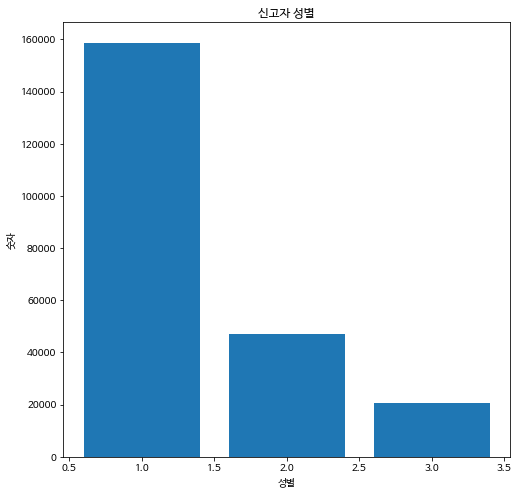

In [ ]:
sexdata_21=accident_2021.RPTER_SEX.value_counts().sort_index(ascending=True)
plt.figure(figsize=(8,8))
plt.bar(sexdata_21.index,sexdata_21)
plt.title('신고자 성별')
plt.xlabel('성별')
plt.ylabel('숫자')
plt.show()

In [ ]:
accident_dept_21=accident_2021.RECV_DEPT_NM
accident_dept_21

20         충남청
23         대전청
26         대전청
44         충남청
49         충남청
          ... 
2593994    대전청
2594002    충남청
2594006    충남청
2594019    대전청
2594035    대전청
Name: RECV_DEPT_NM, Length: 226336, dtype: object

In [ ]:
partdata_21=dept_by_accident=accident_dept_21.value_counts()
partdata_21

충남청        134084
대전청         90718
남대전지구대        286
대전역지구대        225
서대전지구대        204
대전유성서         135
대전파출소         114
세종대왕파출소        79
대전동부서          68
대전서부서          59
세종남부서          56
대전중부서          51
대전대덕서          42
대전둔산서          41
세종청            39
세종서            38
대전유성           19
세종북부서          18
세종             15
세종로파출소         11
대전둔산           11
대전동부            9
대전중부            6
대전대덕            5
대전서부            3
Name: RECV_DEPT_NM, dtype: int64

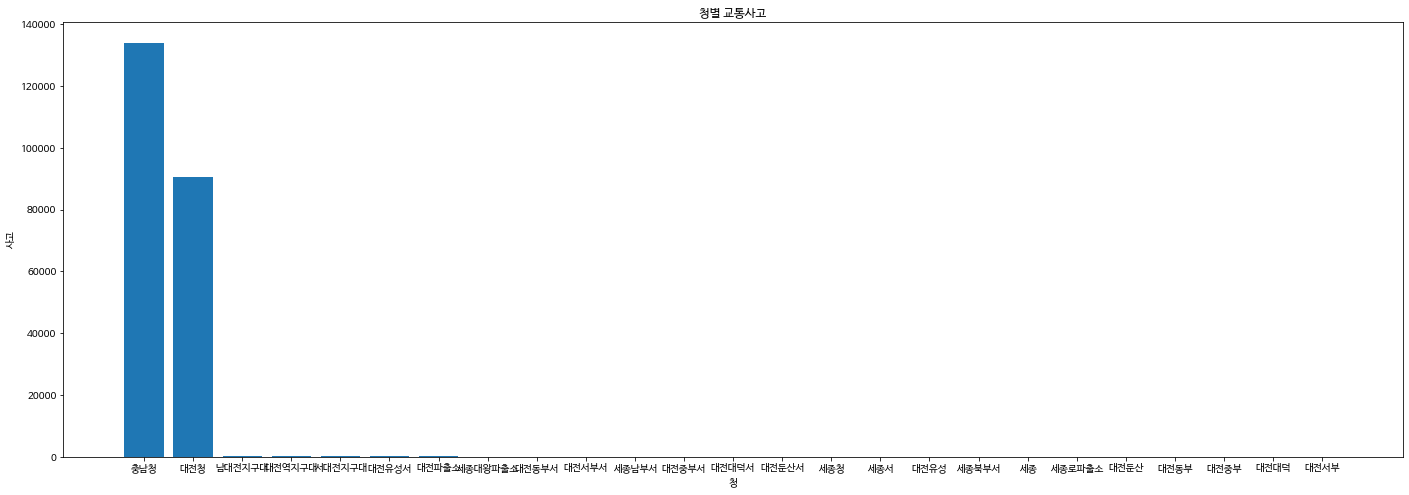

In [ ]:
plt.figure(figsize=(24,8))
plt.bar(partdata_21.index,partdata_21)
plt.title('청별 교통사고')
plt.xlabel('청')
plt.ylabel('사고')
plt.show()

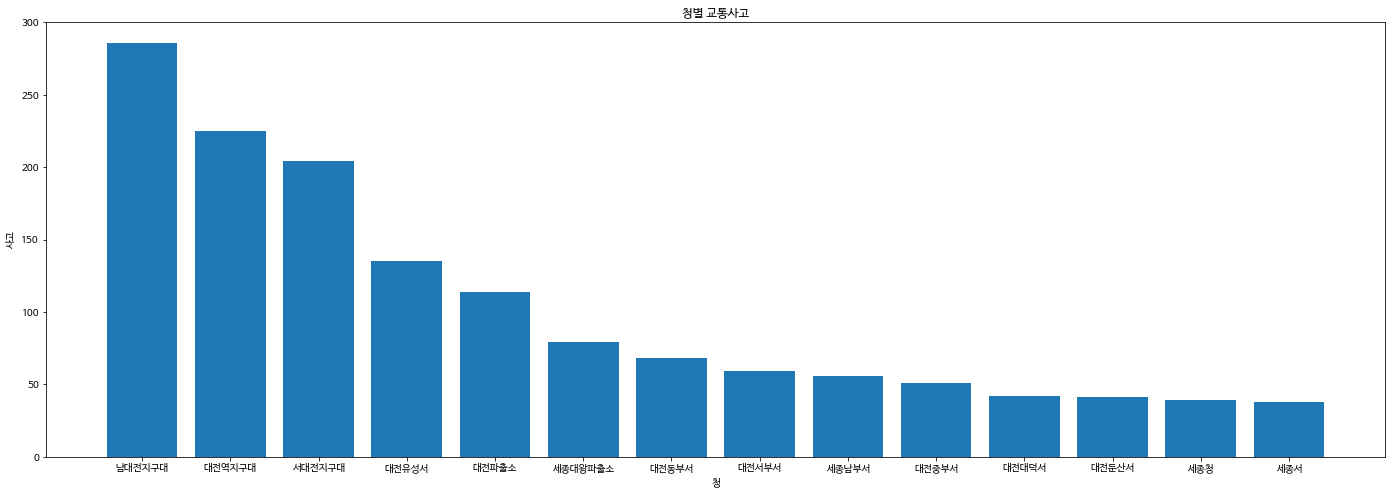

In [ ]:
plt.figure(figsize=(24,8))
plt.bar(partdata_21[2:16].index,partdata_21[2:16])
plt.title('청별 교통사고')
plt.xlabel('청')
plt.ylabel('사고')
plt.show()

ValueError: ignored

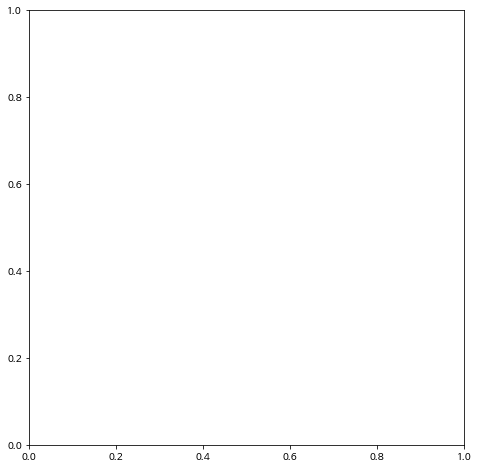

In [ ]:
plt.figure(figsize=(24,8))
plt.pie(partdata_21[2:16], labels=accident_2021.RECV_DEPT_NM)
plt.show()

In [ ]:
accident_2021.Date

20        2021-03-07 00:09:04
23        2021-03-07 00:07:54
26        2021-03-07 00:15:27
44        2021-03-07 00:12:08
49        2021-03-07 00:13:58
                  ...        
2593994   2023-01-15 20:01:39
2594002   2023-01-16 21:26:56
2594006   2023-01-14 01:02:48
2594019   2023-01-14 17:35:38
2594035   2023-01-15 01:13:20
Name: Date, Length: 226336, dtype: datetime64[ns]

In [ ]:
monthdata_21=accident_2021.Date_month_name.value_counts().sort_index(ascending=True) #월별
monthdata_21

April        17177
August       19489
December     19214
February     13639
January      19889
July         19712
June         18595
March        16162
May          19049
November     20640
October      21302
September    21468
Name: Date_month_name, dtype: int64

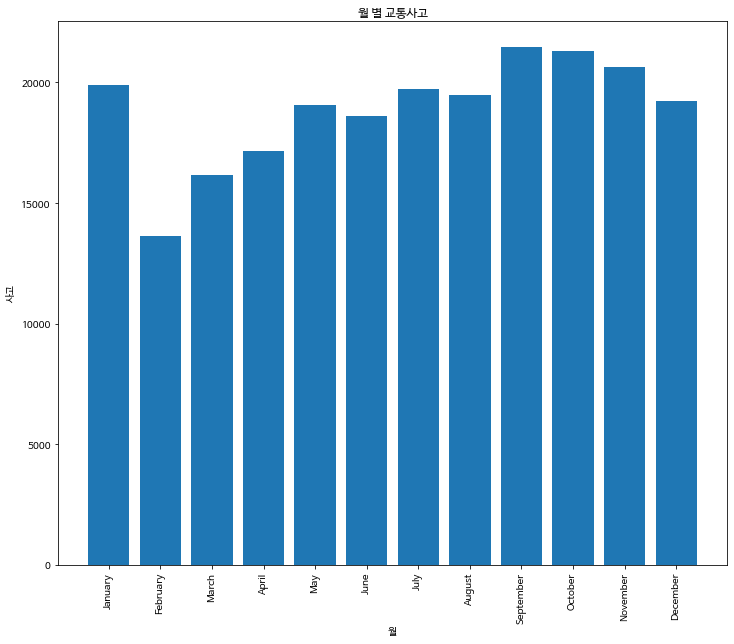

In [ ]:
months=['January','February','March','April',"May","June","July", "August", "September", "October", "November", "December"]
monthdata_21=monthdata_21.agg(months)
plt.figure(figsize=(12,10))
plt.bar(monthdata_21.index,monthdata_21)
plt.title('월 별 교통사고')
plt.xlabel('월')
plt.ylabel('사고')
plt.xticks(rotation=90)
plt.show()

In [ ]:
hourdata_21=accident_2021.Date_hour.value_counts().sort_index(ascending=True) #시간별
hourdata_21

0      5279
1      3597
2      2419
3      1826
4      1555
5      2045
6      3524
7      6318
8     10951
9     11101
10    11742
11    12524
12    12781
13    13706
14    14545
15    14715
16    14984
17    16069
18    17515
19    12745
20    10793
21    10156
22     8869
23     6577
Name: Date_hour, dtype: int64

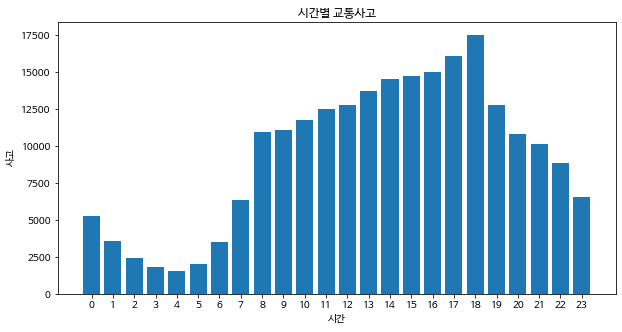

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(hourdata_21.index,hourdata_21)
plt.title('시간별 교통사고')
plt.xlabel('시간')
plt.ylabel('사고')
plt.xticks(np.arange(24))
plt.show()

In [ ]:
weekdata_21=accident_2021.Date_weekname.value_counts().sort_index(ascending=True)
weekdata_21

Friday       35979
Monday       32273
Saturday     35393
Sunday       26649
Thursday     31750
Tuesday      32085
Wednesday    32207
Name: Date_weekname, dtype: int64

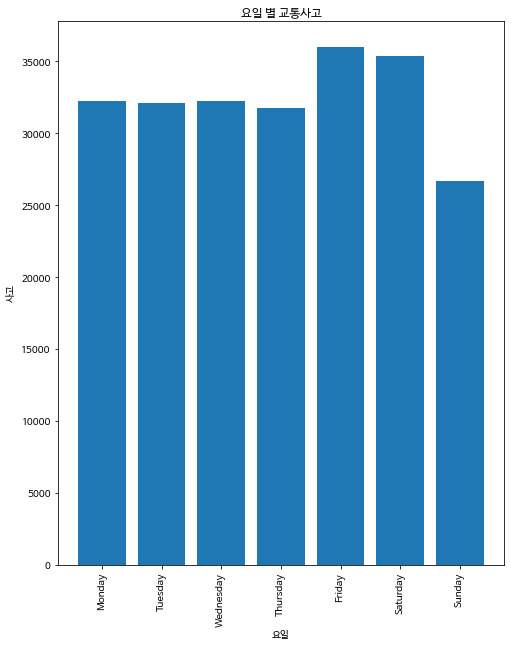

In [ ]:
weeks=['Monday','Tuesday','Wednesday','Thursday',"Friday","Saturday","Sunday"]
weekdata_21=weekdata_21.agg(weeks)
plt.figure(figsize=(8,10))
plt.bar(weekdata_21.index,weekdata_21)
plt.title('요일 별 교통사고')
plt.xlabel('요일')
plt.ylabel('사고')
plt.xticks(rotation=90)
plt.show()

# NPA

In [ ]:
file_path3='/content/drive/MyDrive/traffic/NPA2020.csv'

df_NPA_2020 = pd.read_csv(file_path3, encoding='cp949')
df_NPA_2020

,RECV_CPLT_DT,RECV_CPLT_TM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,20200101,7,13,10,501,2,대전광역시 중구 목동(행정:목동) 360,127.409270,36.333010,Y
1,20200101,132,13,10,501,1,대전광역시 중구 대흥동(대흥동) 499-1,127.421295,36.325575,NaN
2,20200101,39,13,10,501,1,NaN,127.404663,36.341685,NaN
3,20200101,110,13,10,601,3,NaN,0.000000,0.000000,NaN
4,20200101,342,13,10,601,1,NaN,127.404663,36.341685,NaN
...,...,...,...,...,...,...,...,...,...,...
1178239,20201122,3505,19,10,501,1,,NaN,NaN,
1178240,20201122,5213,13,10,601,,,127.404663,36.341685,
1178241,20201122,4627,19,10,601,1,,NaN,NaN,Y
1178242,20201122,5246,19,5,301,1,충청남도 보령시 신흑동(행정:대천5동),126.516040,36.305619,


In [ ]:
df_NPA_2020.dtypes

RECV_CPLT_DT       int64
RECV_CPLT_TM       int64
NPA_CL             int64
EVT_STAT_CD        int64
EVT_CL_CD          int64
RPTER_SEX         object
HPPN_OLD_ADDR     object
HPPN_X           float64
HPPN_Y           float64
SME_EVT_YN        object
dtype: object

In [ ]:
change_date=df_NPA_2020['Date'] = df_NPA_2020['RECV_CPLT_DT'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d')) #날짜 데이터로 바꾸기
change_date

0         2020-01-01
1         2020-01-01
2         2020-01-01
3         2020-01-01
4         2020-01-01
             ...    
1178239   2020-11-22
1178240   2020-11-22
1178241   2020-11-22
1178242   2020-11-22
1178243   2020-11-22
Name: RECV_CPLT_DT, Length: 1178244, dtype: datetime64[ns]

In [ ]:
df_NPA_2020['Time'] = pd.to_datetime(df_NPA_2020['RECV_CPLT_TM'].astype(str).str.zfill(6), format='%H%M%S') #시간데이터로 바꾸기, 앞에 1900-01-01은 밑에서 다 버릴예정
df_NPA_2020.Time


0         1900-01-01 00:00:07
1         1900-01-01 00:01:32
2         1900-01-01 00:00:39
3         1900-01-01 00:01:10
4         1900-01-01 00:03:42
                  ...        
1178239   1900-01-01 00:35:05
1178240   1900-01-01 00:52:13
1178241   1900-01-01 00:46:27
1178242   1900-01-01 00:52:46
1178243   1900-01-01 00:11:34
Name: Time, Length: 1178244, dtype: datetime64[ns]

In [ ]:
df_NPA_2020['Date_month']=df_NPA_2020['Date'].dt.month #월별로 데이터처리
df_NPA_2020['Date_month_name']=df_NPA_2020['Date'].dt.month_name() #월별로 데이터처리
df_NPA_2020['Date_date']=df_NPA_2020['Date'].dt.date #날짜별로 데이터처리
df_NPA_2020['Date_day']=df_NPA_2020['Date'].dt.day #일별로 데이터 처리
df_NPA_2020['Date_time']=df_NPA_2020['Time'].dt.time #전체 시간별로 데이터 처리
df_NPA_2020['Date_hour']=df_NPA_2020['Time'].dt.hour #시간별로 데이터 처리(0~23시)
df_NPA_2020['Date_weekname']=df_NPA_2020['Date'].dt.day_name() #요일별 데이터 처리

In [ ]:
is_accident_2020 = (df_NPA_2020['EVT_CL_CD'] == 401) | (df_NPA_2020['EVT_CL_CD']==402) | (df_NPA_2020['EVT_CL_CD']==403) | (df_NPA_2020['EVT_CL_CD']==404) #교통관련 데이터만 분류
accident_2020 = df_NPA_2020[is_accident_2020]
accident_2020

,RECV_CPLT_DT,RECV_CPLT_TM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,Date,Time,Date_month,Date_month_name,Date_date,Date_day,Date_time,Date_hour,Date_weekname
38,20200101,3240,13,10,402,1,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN,2020-01-01,1900-01-01 00:32:40,1,January,2020-01-01,1,00:32:40,0,Wednesday
54,20200101,2135,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,2020-01-01,1900-01-01 00:21:35,1,January,2020-01-01,1,00:21:35,0,Wednesday
66,20200101,4301,13,10,401,1,대전광역시 중구 오류동(행정:오류동) 187-27,127.405055,36.328573,NaN,2020-01-01,1900-01-01 00:43:01,1,January,2020-01-01,1,00:43:01,0,Wednesday
117,20200101,184335,13,10,401,3,대전광역시 동구 가양동 630,127.445780,36.345500,N,2020-01-01,1900-01-01 18:43:35,1,January,2020-01-01,1,18:43:35,18,Wednesday
118,20200101,184647,13,10,403,1,NaN,127.404663,36.341685,NaN,2020-01-01,1900-01-01 18:46:47,1,January,2020-01-01,1,18:46:47,18,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178004,20201120,102622,19,10,402,1,충청남도 논산시 강경읍 염천리(행정:강경읍) 20,127.014461,36.161151,,2020-11-20,1900-01-01 10:26:22,11,November,2020-11-20,20,10:26:22,10,Friday
1178035,20201122,322,13,5,401,1,대전광역시 유성구 봉명동(행정:온천1동) 651-1,127.347209,36.357588,,2020-11-22,1900-01-01 00:03:22,11,November,2020-11-22,22,00:03:22,0,Sunday
1178051,20201122,5410,13,5,401,1,대전광역시 유성구 장대동(행정:온천2동) 375-3,127.339844,36.358391,,2020-11-22,1900-01-01 00:54:10,11,November,2020-11-22,22,00:54:10,0,Sunday
1178086,20201122,4008,13,5,401,1,대전광역시 동구 신흥동(행정:신인동) 212,127.446090,36.320140,Y,2020-11-22,1900-01-01 00:40:08,11,November,2020-11-22,22,00:40:08,0,Sunday


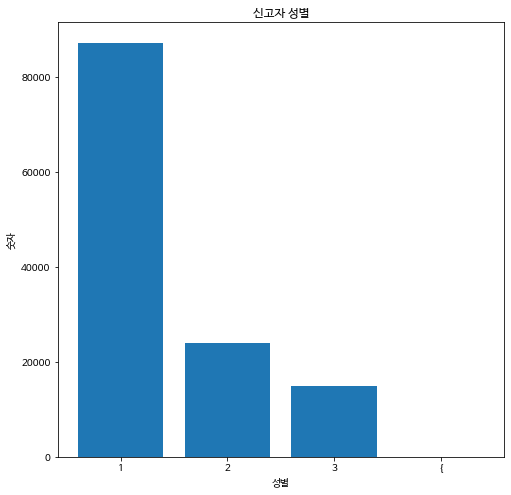

In [ ]:
sexdata_2020=accident_2020.RPTER_SEX.value_counts().sort_index(ascending=True) #신고자 성별 분석
plt.figure(figsize=(8,8))
plt.bar(sexdata_2020.index,sexdata_2020)
plt.title('신고자 성별')
plt.xlabel('성별')
plt.ylabel('숫자')
plt.show()

In [ ]:
sexdata_2020

1    87269
2    23964
3    14879
{        1
Name: RPTER_SEX, dtype: int64

In [ ]:
accident_dept_2020=accident_2020.NPA_CL #청 분석
accident_dept_2020

38         13
54         13
66         13
117        13
118        13
           ..
1178004    19
1178035    13
1178051    13
1178086    13
1178173    13
Name: NPA_CL, Length: 126113, dtype: int64

In [ ]:
partdata_2020=dept_by_accident=accident_dept_2020.value_counts()
partdata_2020

19    80698
13    45415
Name: NPA_CL, dtype: int64

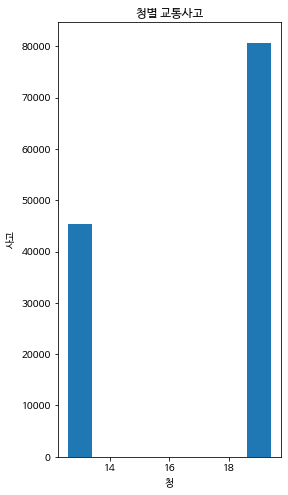

In [ ]:
plt.figure(figsize=(4,8))
plt.bar(partdata_2020.index,partdata_2020)
plt.title('청별 교통사고')
plt.xlabel('청')
plt.ylabel('사고')
plt.show()

In [ ]:
monthdata_2020=accident_2020.Date_month_name.value_counts().sort_index(ascending=True) #월별
monthdata_2020

April        10465
August       12865
February     10097
January      11501
July         12783
June         12454
March         9430
May          12149
November      8821
October      12529
September    13019
Name: Date_month_name, dtype: int64

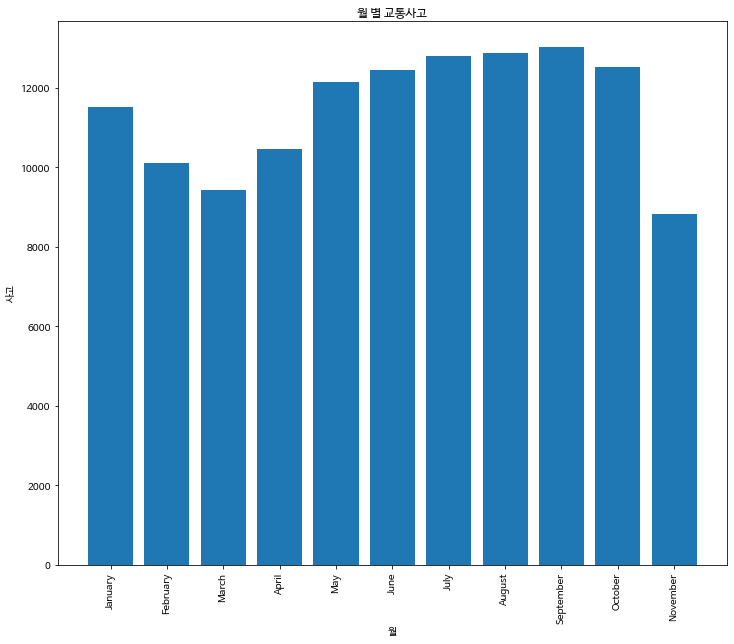

In [ ]:
months=['January','February','March','April',"May","June","July", "August", "September", "October", "November"] #데이터가 11월까지라 12월은 없음
monthdata_2020=monthdata_2020.agg(months)
plt.figure(figsize=(12,10))
plt.bar(monthdata_2020.index,monthdata_2020)
plt.title('월 별 교통사고')
plt.xlabel('월')
plt.ylabel('사고')
plt.xticks(rotation=90)
plt.show()

In [ ]:
hourdata_2020=accident_2020.Date_hour.value_counts().sort_index(ascending=True) #시간별
hourdata_2020

0     3016
1     2244
2     1717
3     1305
4     1120
5     1256
6     2137
7     3560
8     5789
9     6253
10    6913
11    6940
12    6895
13    7663
14    8109
15    8095
16    8235
17    8820
18    9377
19    7118
20    5984
21    5337
22    4705
23    3525
Name: Date_hour, dtype: int64

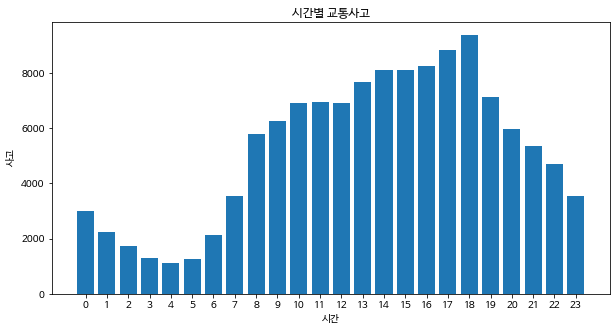

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(hourdata_2020.index,hourdata_2020)
plt.title('시간별 교통사고')
plt.xlabel('시간')
plt.ylabel('사고')
plt.xticks(np.arange(24))
plt.show()

In [ ]:
weekdata_2020=accident_2020.Date_weekname.value_counts().sort_index(ascending=True) #요일벌
weekdata_2020

Friday       19728
Monday       18515
Saturday     19028
Sunday       14583
Thursday     18381
Tuesday      17968
Wednesday    17910
Name: Date_weekname, dtype: int64

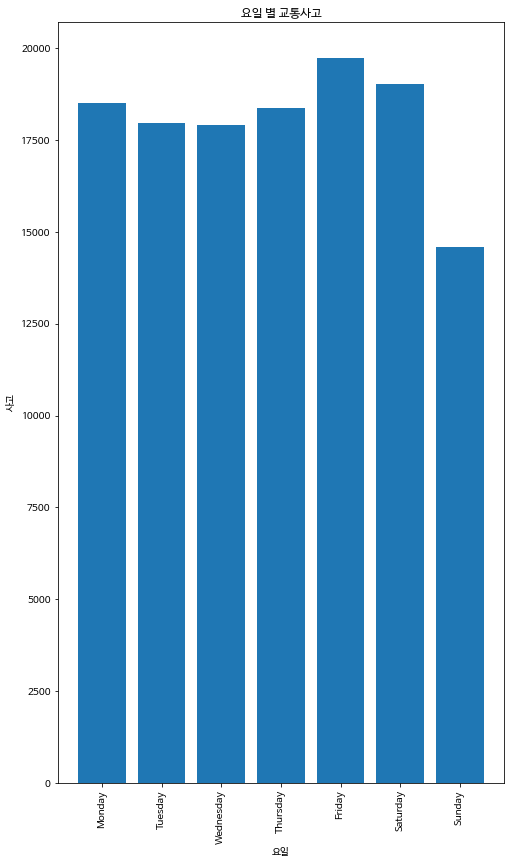

In [ ]:
weeks=['Monday','Tuesday','Wednesday','Thursday',"Friday","Saturday","Sunday"]
weekdata_2020=weekdata_2020.agg(weeks)
plt.figure(figsize=(8,14))
plt.bar(weekdata_2020.index,weekdata_2020)
plt.title('요일 별 교통사고')
plt.xlabel('요일')
plt.ylabel('사고')
plt.xticks(rotation=90)
plt.show()